In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training set

## Reading files

In [2]:
def readFiles(filename):
    df = pd.read_csv(filename)
    return df

In [3]:
x = readFiles('./Training Data/Linear_X_Train.csv')
y = readFiles('./Training Data/Linear_Y_Train.csv')

z = x.as_matrix()
x = z.flatten()

z = y.as_matrix()
y = z.flatten()


C:\Users\Dhruvam_Zaveri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Dhruvam_Zaveri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


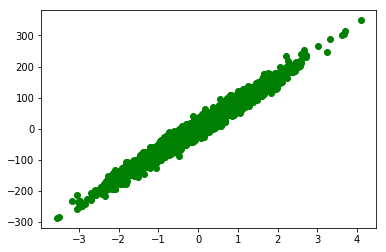

In [4]:
plt.scatter(x,y,color = 'g')

## Normalising the data

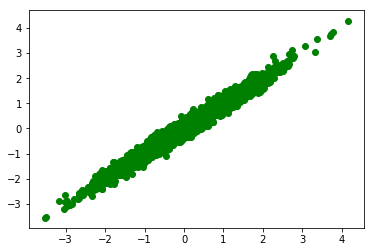

In [5]:
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()


plt.scatter(x,y,color = 'g')

## Applying Linear Regression

### Hypothesis

In [6]:
# y = m*x + c
# also predicts the value

def hypothesis(theta, x):
    return (theta[0] + theta[1]*x)


### Error function

In [7]:
def error(x,y,theta):
    
    size = x.shape[0]
    total_error = 0
    for i in range(size):
        
        #total error is the summation of the difference b/w actual value(y[i]) and predicted value(value form hypothesis)
        
        total_error += (y[i] - hypothesis(theta,x[i]))**2    
        return 0.5*total_error

### Function for update rules

In [8]:
# Calculating derivatives (Gradients)

def gradient(x,y,theta):
     
    grad = np.array([0.0,0.0])
    size = x.shape[0]
    for i in range(size):
        
        grad[0] += (hypothesis(theta,x[i]) - y[i])
        grad[1] += (hypothesis(theta,x[i]) - y[i])*x[i]
        
    return grad

### Gradient decient

In [9]:
def gradient_decent(x,y,learning_rate,maxIter):
    
    error_array = []
    theta = np.array([-2.0,0.0])
    for i in range(maxIter):
        grad = gradient(x,y,theta)
        err = error(x,y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        error_array.append(err)
        
    return theta,error_array

In [10]:
theta,err = gradient_decent(x,y,learning_rate= 0.00001,maxIter = 500)
print(theta)

[-1.00322671e-08  9.85373642e-01]


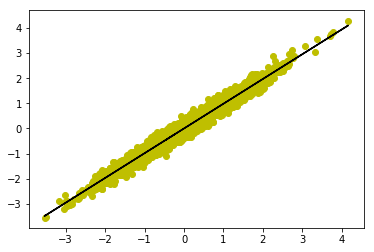

In [11]:
plt.scatter(x,y,color = 'y')
plt.plot(x,hypothesis(theta,x), color = 'black')

# Testing Set

C:\Users\Dhruvam_Zaveri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


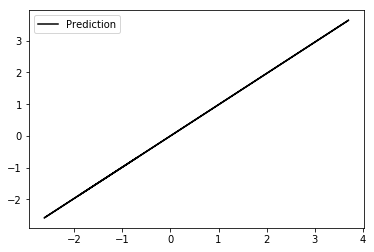


Result generated : 
[-1.85047694 -0.85632115 -2.49317508 ...  0.12613552 -0.27397092
 -0.67047329]


In [12]:
xtest = readFiles('./Testing Data/Linear_X_Test.csv')

z = xtest.as_matrix()
xtest = z.flatten()
result = hypothesis(theta,xtest)

plt.plot(xtest,result,color='black',label="Prediction")
plt.legend()
plt.show()

print("\nResult generated : ")
print(result)